In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
import numpy as np

import camb
from camb import model, initialpower
import pandas as pd

In [24]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location(
    "spectra", "../shared/spectra.py")
spectra = importlib.util.module_from_spec(spec)
sys.modules["spectra"] = spectra
spec.loader.exec_module(spectra)

In [25]:
omega_index = 1 # while we debug, we confine our attention to just one value
onh2 = spectra.omegas_nu[omega_index]
onh2_str = spectra.omnu_strings[omega_index]

In [26]:
'''
First, we need to define a Pandas table containing my exotic cosmologies.
'''
num_models = 10
def row_conglomerator():
    rows = [spectra.get_cosmology() for i in range(num_models)]
    conglomerate = {}
    for key in rows[0].keys():
        conglomerate[key] = [rows[0][key]]
        for i in range(1, num_models):
            conglomerate[key].append(rows[i][key])
    return conglomerate
            
conglomerate = row_conglomerator()
cosm = pd.DataFrame.from_dict(conglomerate)
cosm

,OmM,OmL,OmK,OmC,OmB,h,w0,wa,omch2,ombh2,n_s,A_s
0,0.812063,0.164856,0.023081,0.096703,0.903297,0.664105,-0.900894,0.005083,0.042649,0.398386,0.783872,1.886005e-09
1,0.403440,0.265794,0.330766,0.149076,0.850924,0.726341,-0.863842,-0.042882,0.078648,0.448924,0.519031,1.924480e-09
2,0.294711,0.616814,0.088475,0.141717,0.858283,0.581569,-0.958555,-0.157767,0.047932,0.290290,0.969731,1.897580e-09
3,0.918178,0.066550,0.015272,0.795079,0.204921,0.559938,-1.018720,0.135656,0.249282,0.064249,0.455623,1.804422e-09
4,0.030294,0.902007,0.067698,0.013564,0.986436,0.563382,-0.875825,-0.019090,0.004305,0.313094,0.781606,1.953762e-09
5,0.154367,0.149382,0.696251,0.105896,0.894104,0.751875,-0.887234,0.019018,0.059865,0.505451,0.511059,1.790341e-09
6,0.658937,0.102795,0.238268,0.612129,0.387871,0.737906,-0.996333,-0.048784,0.333308,0.211198,0.292626,2.189101e-09
7,0.148973,0.252037,0.598989,0.021835,0.978165,0.731030,-0.998010,-0.056137,0.011668,0.522736,0.973874,2.302574e-09
8,0.469628,0.042846,0.487526,0.289808,0.710192,0.658144,-0.942913,-0.044201,0.125531,0.307623,0.502754,2.464688e-09
9,0.409225,0.230260,0.360516,0.309223,0.690777,0.603090,-1.118288,0.130049,0.112470,0.251248,0.332439,2.361168e-09


In [27]:
cosm.loc[9]

OmM      4.092247e-01
OmL      2.302597e-01
OmK      3.605156e-01
OmC      3.092226e-01
OmB      6.907774e-01
h        6.030901e-01
w0      -1.118288e+00
wa       1.300487e-01
omch2    1.124697e-01
ombh2    2.512480e-01
n_s      3.324386e-01
A_s      2.361168e-09
Name: 9, dtype: float64

In [28]:
# It's a waste of time to consider all of the omegas and snapshots, so we're
# making heavy use of skips.
spec_sims = spectra.better_battery(spectra.omegas_nu, spectra.omnu_strings,
    skips_omega = [0, 2, 3], skips_model=[], skips_snapshot=[1, 2, 3],
    models=cosm)

0
1
2


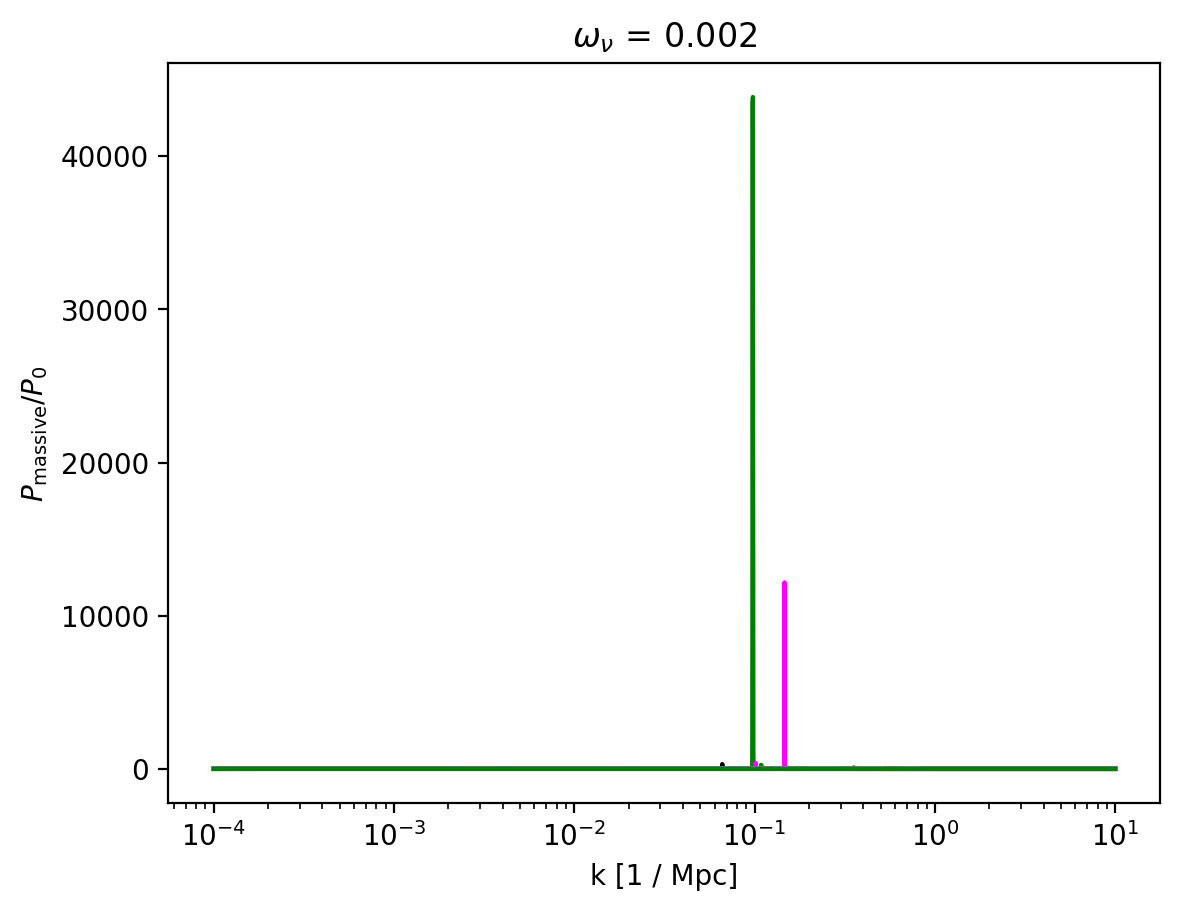

In [29]:
colors = spectra.colors * 2
styles = spectra.styles * 2
for i in range(len(spec_sims[onh2_str])):
    if spec_sims[onh2_str][i] is None:
        continue
    h = cosm.loc[i]["h"]
    for j in range(len(spec_sims[onh2_str][i])):
        if spec_sims[onh2_str][i][j] is None:
            continue
        plt.plot(spec_sims[onh2_str][i][j]["k"],
            spec_sims[onh2_str][i][j]["P_nu"] / \
            spec_sims[onh2_str][i][j]["P_no"],
            label="model " + str(i) + ", no renormalizing, z=" + \
            str(spectra.parse_redshifts(i)[j]), c=colors[i],
            linestyle=styles[i])
    plt.xscale('log')
    plt.xlabel(r"k [1 / Mpc]")
    plt.ylabel(r"$P_\mathrm{massive} / P_0$")
    plt.title(r"$\omega_\nu$ = " + onh2_str)

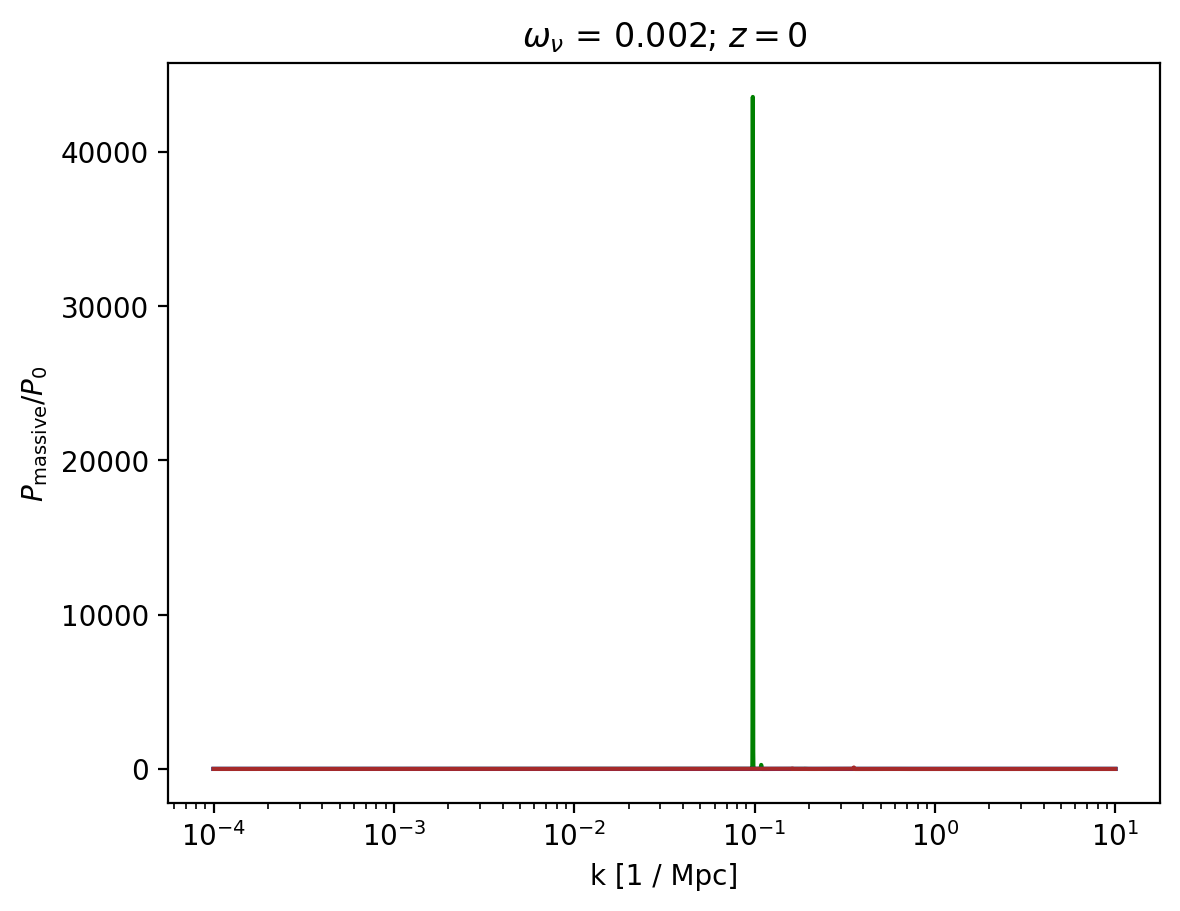

In [30]:
for i in range(0, 3):
    if spec_sims[onh2_str][i] is None:
        continue
    h = spectra.cosm.loc[i]["h"]
    j = 4 # just look at z=0 before moving on
    plt.plot(spec_sims[onh2_str][i][j]["k"],
        spec_sims[onh2_str][i][j]["P_nu"] / \
        spec_sims[onh2_str][i][j]["P_no"],
        label="model " + str(i), c=colors[i])
    plt.xscale('log')
    plt.xlabel(r"k [1 / Mpc]")
    plt.ylabel(r"$P_\mathrm{massive} / P_0$")
    plt.title(r"$\omega_\nu$ = " + onh2_str + "; $z=0$")

Currently I am not re-normalizing the amplitude of one model based on its counterpart. At least, I *think* I'm not doing that, but I'm really quite unsure

In [31]:
true2_early = spectra.powernu2[0][0]
true2_late = spectra.powernu2[0][4]
true_early = spectra.powernu[onh2_str][0][0]
true_late = spectra.powernu[onh2_str][0][4]

[2.   1.   0.57 0.3  0.  ]


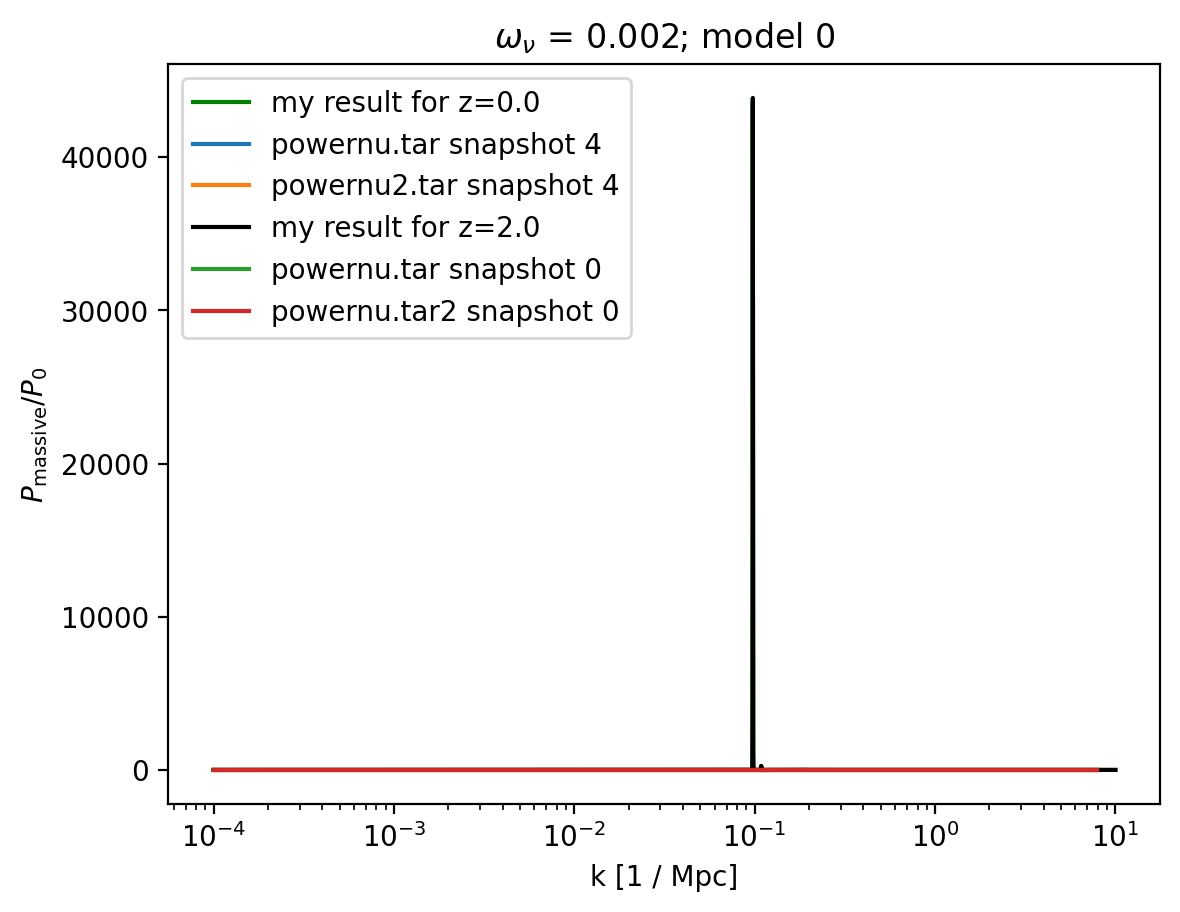

In [32]:
i = 0
h = spectra.cosm.loc[i]["h"]
j = 4 # this should be SNAP index, not z index
z_list = spectra.parse_redshifts(i)
print(z_list)
sim = spec_sims[onh2_str][i][j]

plt.plot(sim["k"], sim["P_nu"] / sim["P_no"], c=colors[i],
    label="my result for z=" + str(sim["z"]))
plt.plot(true_late["k"], true_late["ratio"], label="powernu.tar snapshot 4")
plt.plot(true2_late["k"], true2_late["ratio"],
    label="powernu2.tar snapshot 4")

j = 0 # This will correspond to z=0 for the model0 case.
sim = spec_sims[onh2_str][i][j]

plt.plot(sim["k"], sim["P_nu"] / sim["P_no"], c="black",
    label="my result for z=" + str(sim["z"]))
plt.plot(true_early["k"], true_early["ratio"], label="powernu.tar snapshot 0")
plt.plot(true2_early["k"], true2_early["ratio"],
    label="powernu.tar2 snapshot 0")

plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"$P_\mathrm{massive} / P_0$")
plt.title(r"$\omega_\nu$ = " + onh2_str + "; model 0")
plt.legend()

# This protects other cells by avoiding unintended reuse
del i, h, j, z_list, sim

We've now made absolutely certain that my lines here should overlap with Ariel's. What went wrong?

In [33]:
print(spec_sims[onh2_str][0][4]["z"])
print(spec_sims[onh2_str][0][0]["z"])

0.0
2.0


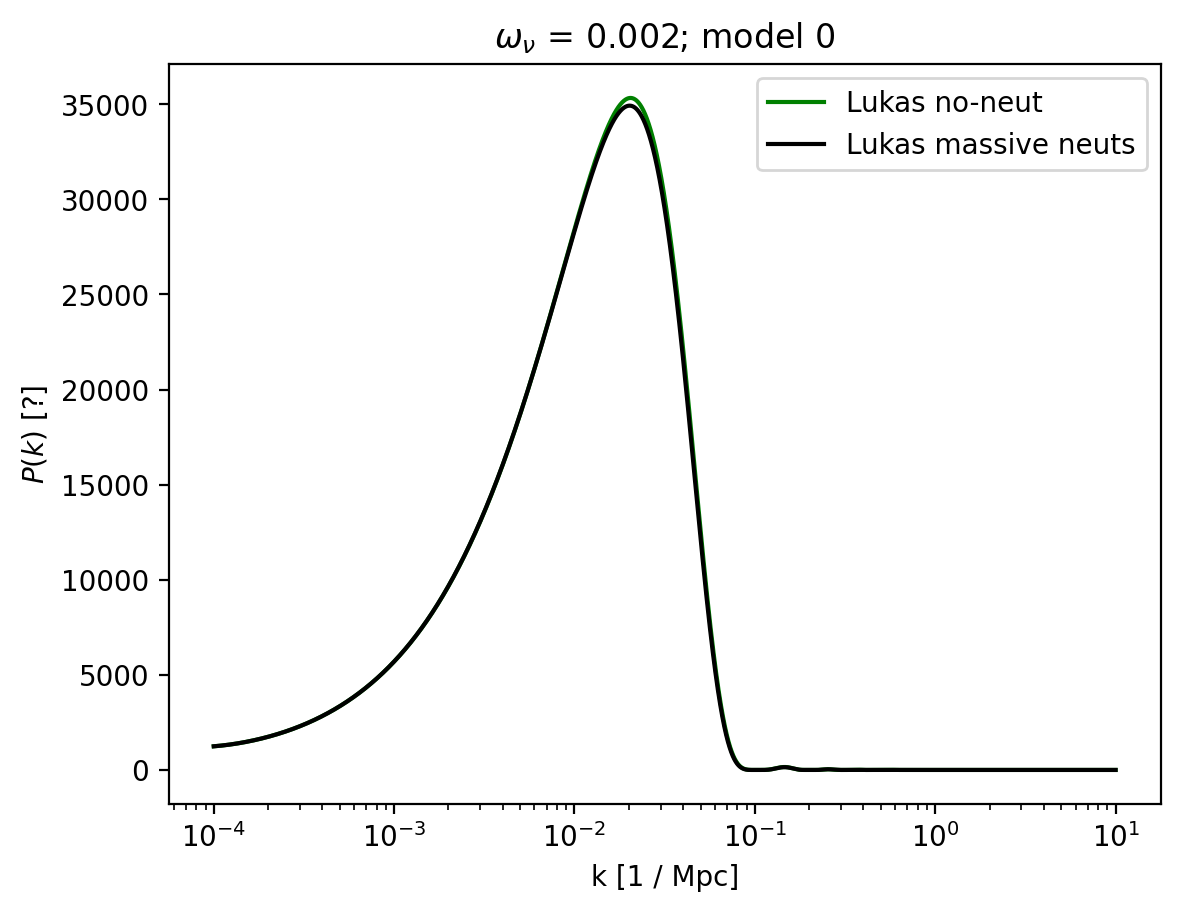

In [37]:
i = 0
h = spectra.cosm.loc[i]["h"]
j = 4
sim = spec_sims[onh2_str][i][j]

plt.plot(sim["k"], sim["P_no"], label="Lukas no-neut", c=spectra.colors[i])
plt.plot(sim["k"], sim["P_nu"], label="Lukas massive neuts", c="black")
plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"$P(k)$ [?]")
plt.title(r"$\omega_\nu$ = " + onh2_str + "; model 0")
plt.legend()

# This protects other cells by avoiding accidental reuse
del i, h, j, sim

In [35]:
true3_early = spectra.powernu3[onh2_str][0][0]
true3_late = spectra.powernu3[onh2_str][0][4]

LCDM = np.load('../../CAKE21/matteos_spectra/LCDM.npy', allow_pickle=True)
nuCDM = np.load('../../CAKE21/matteos_spectra/nuCDM.npy', allow_pickle=True)

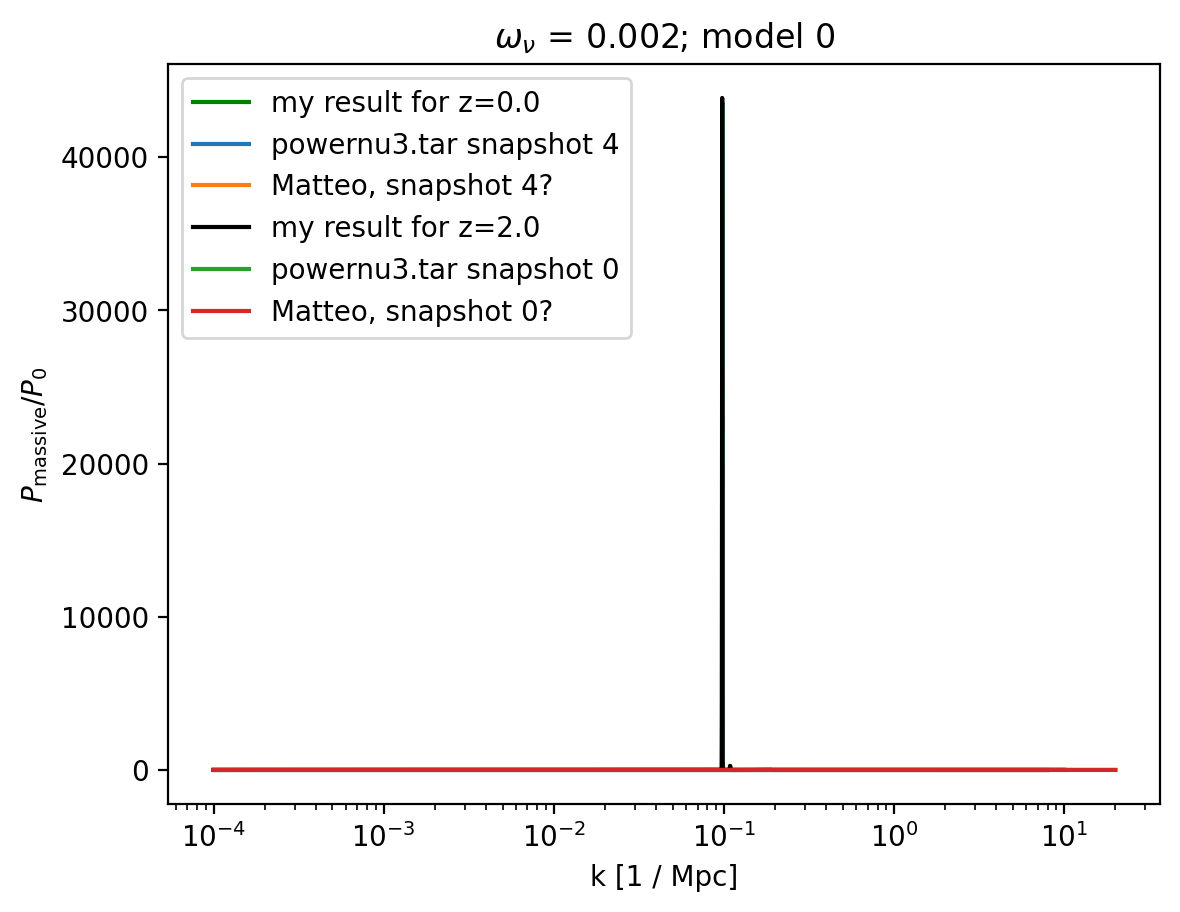

In [36]:
i = 0
h = spectra.cosm.loc[i]["h"]
j = 4 # this should be SNAP index, not z index
z_list = spectra.parse_redshifts(i)
sim = spec_sims[onh2_str][i][j]

plt.plot(sim["k"], sim["P_nu"] / sim["P_no"], c=spectra.colors[i],
    label="my result for z=" + str(sim["z"]))
plt.plot(true3_late["k"], true3_late["ratio"],
         label="powernu3.tar snapshot 4")
plt.plot(LCDM[0]['kk'], nuCDM[0]['Pk'][4]/LCDM[0]['Pk'][4],
             label='Matteo, snapshot 4?'.format(0))

j = 0 # This will correspond to z=0 for the model0 case.
sim = spec_sims[onh2_str][i][j]

plt.plot(sim["k"], sim["P_nu"] / sim["P_no"], c="black",
    label="my result for z=" + str(sim["z"]))
plt.plot(true3_early["k"], true3_early["ratio"],
         label="powernu3.tar snapshot 0")
plt.plot(LCDM[0]['kk'], nuCDM[0]['Pk'][0]/LCDM[0]['Pk'][0],
             label='Matteo, snapshot 0?'.format(0))

plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"$P_\mathrm{massive} / P_0$")
plt.title(r"$\omega_\nu$ = " + onh2_str + "; model 0")
plt.legend()

# This protects other cells by avoiding unintended reuse
del i, h, j, z_list, sim